# Import Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [2]:
### Combinations ###
DataTypeVec = ["Simulate", "BostonHousing", "CPS"]
ModelTypeVec = ["LinearRegression", "RidgeRegression", "RandomForestRegressor"]
RelativeVec = ["Passive", None]
Combinations = list(itertools.product(DataTypeVec, ModelTypeVec, RelativeVec))


/Users/simondn/Documents/RashomonActiveLearning/Code/utils/Auxiliary/MeanVariancePlot.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 6))


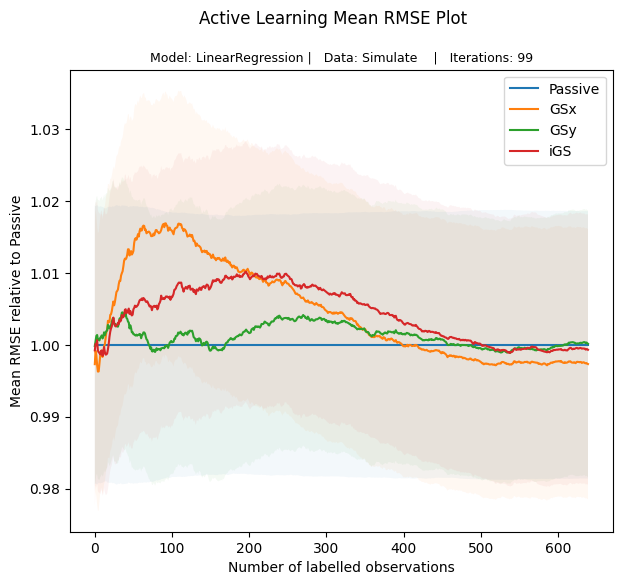

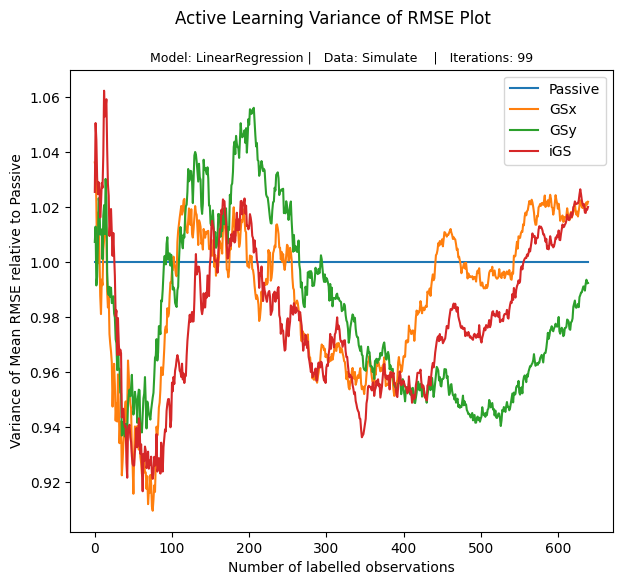

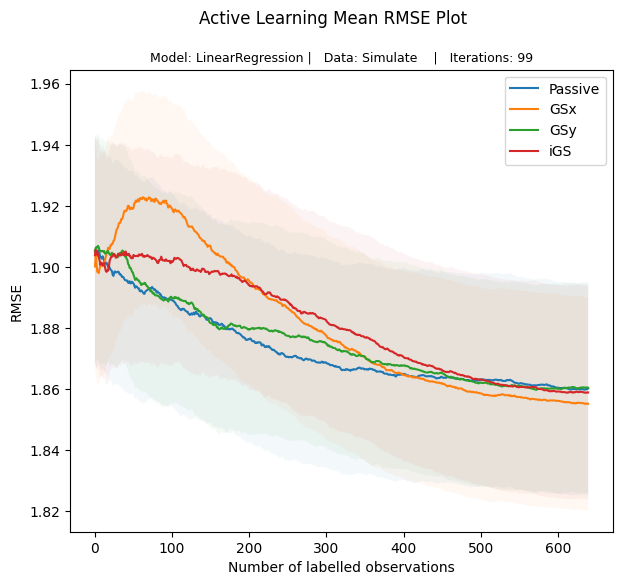

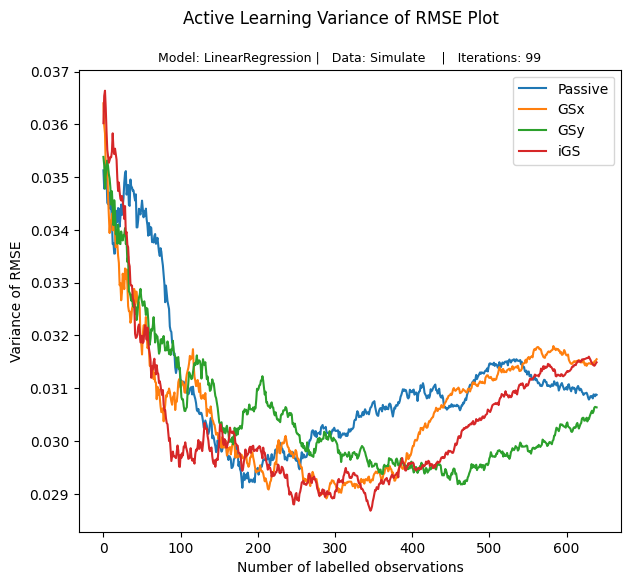

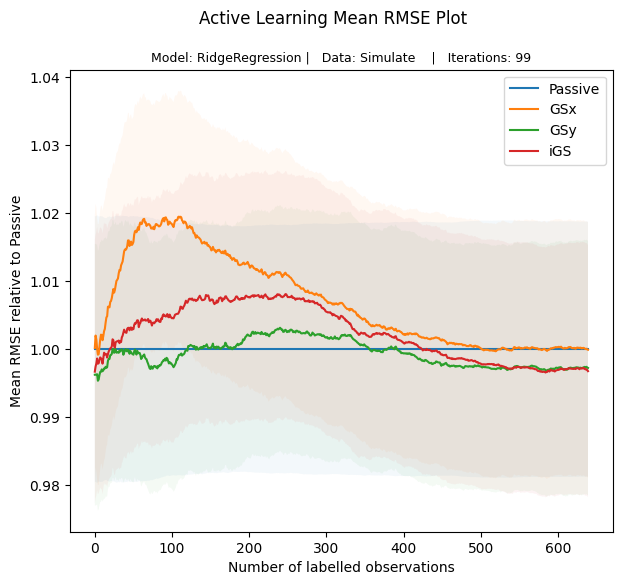

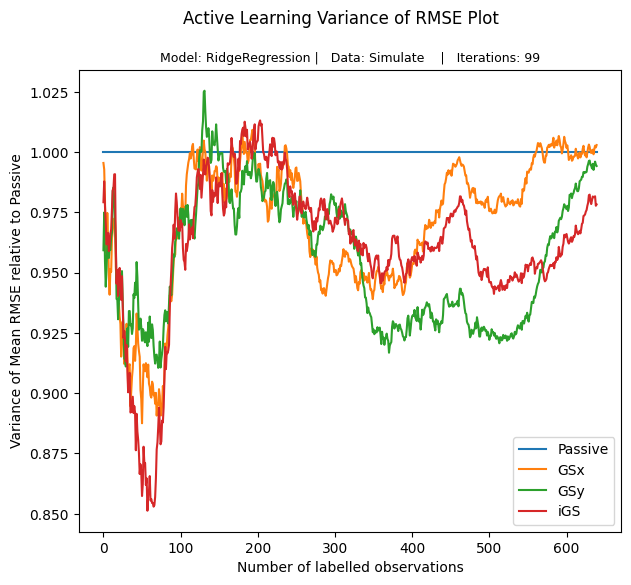

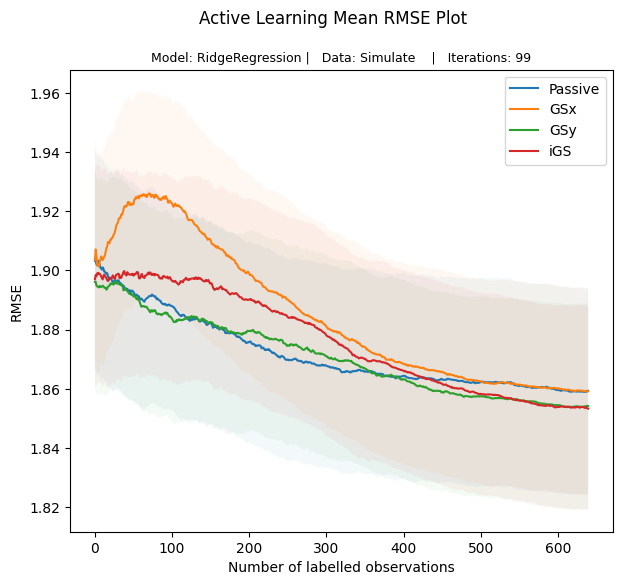

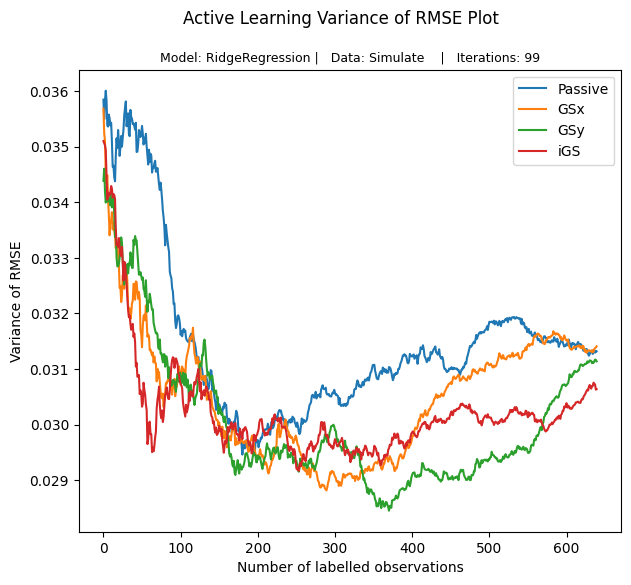

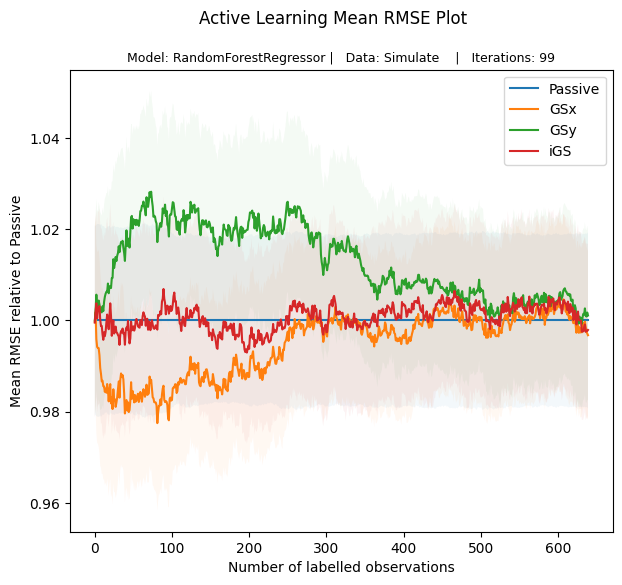

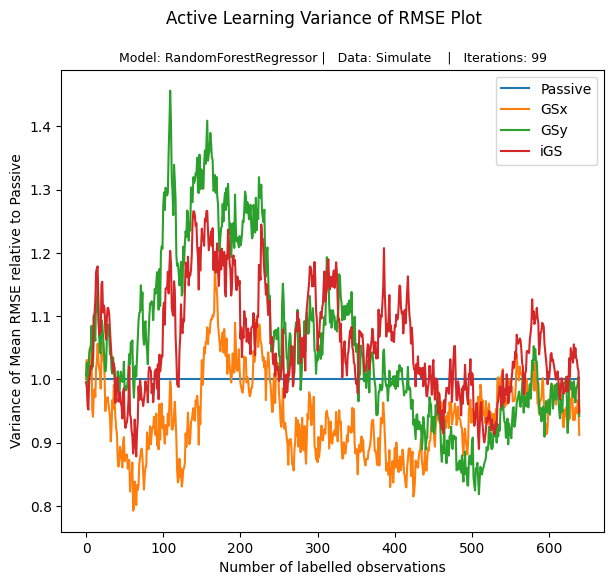

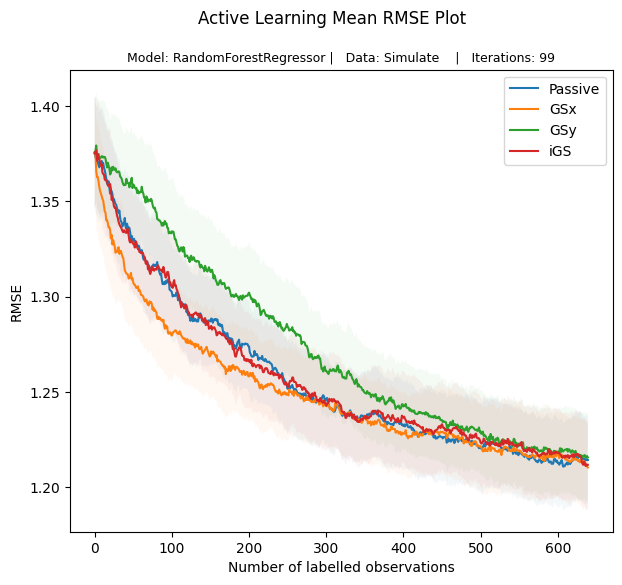

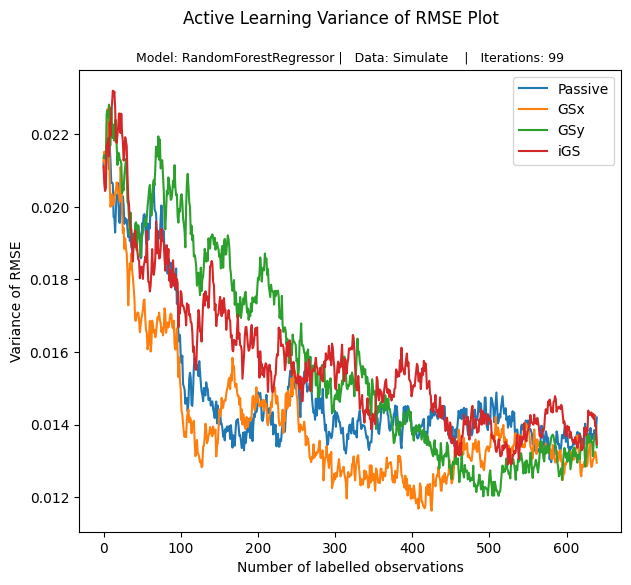

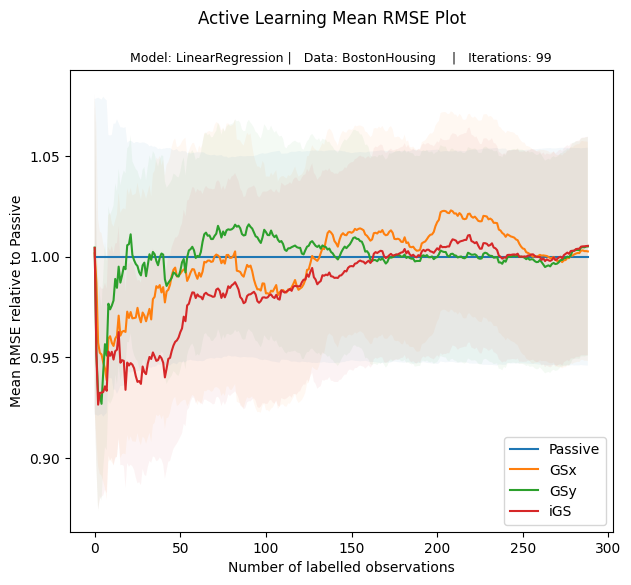

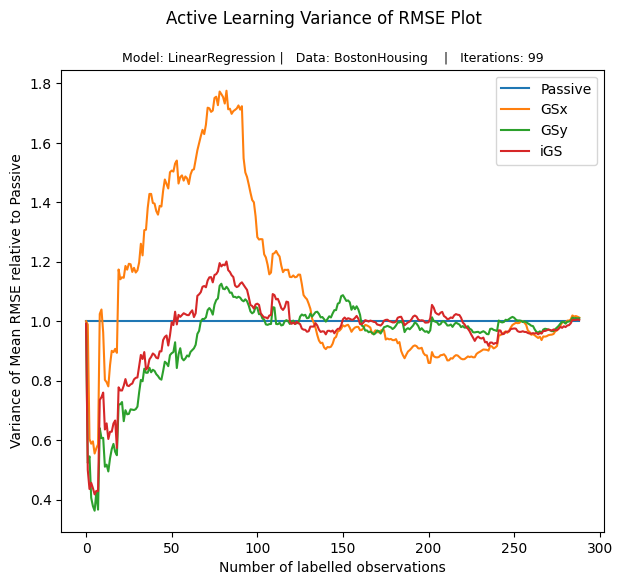

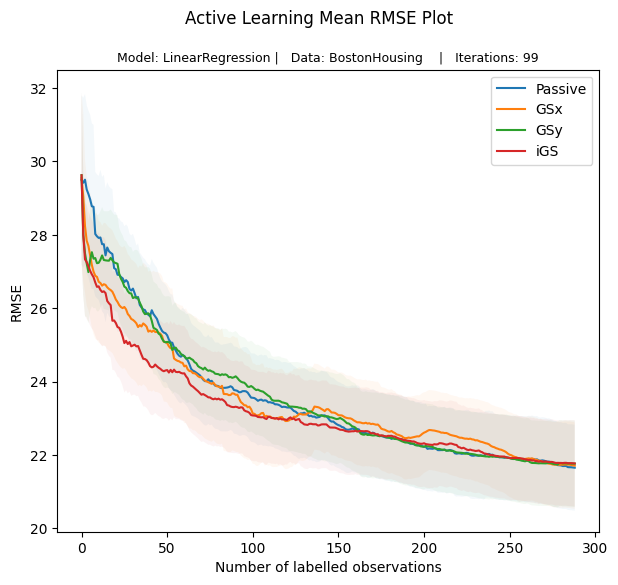

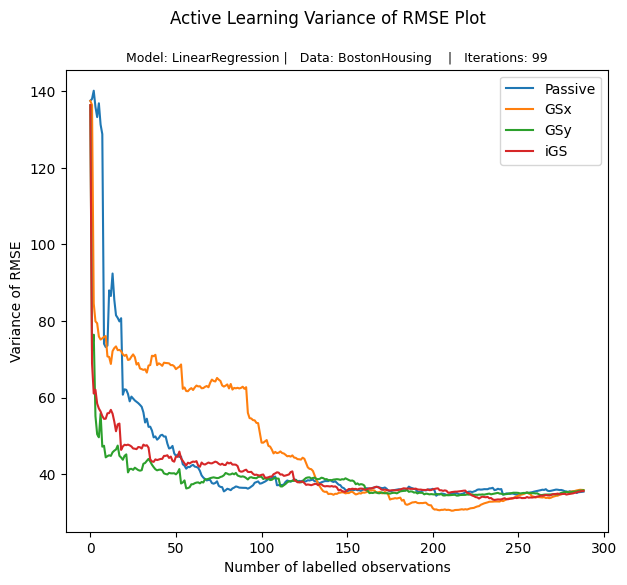

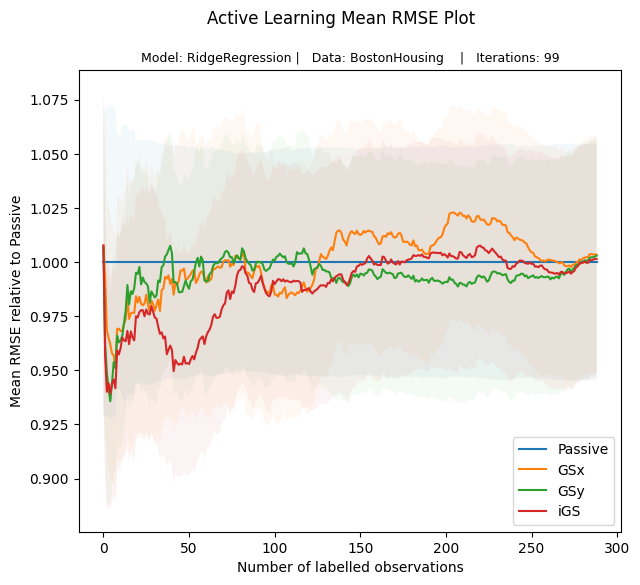

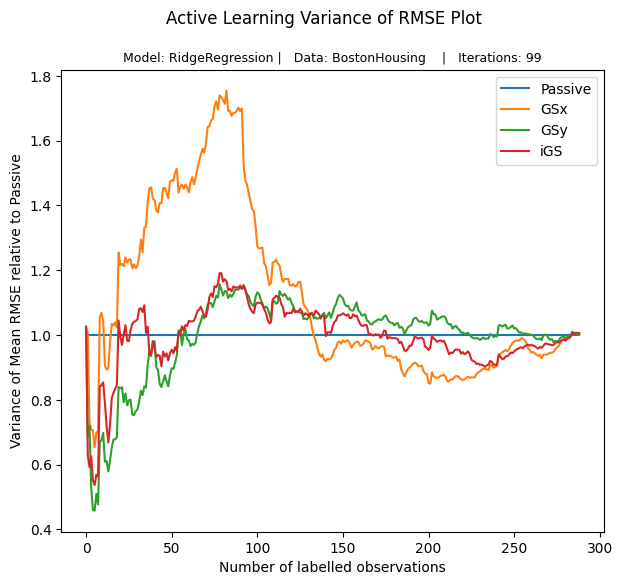

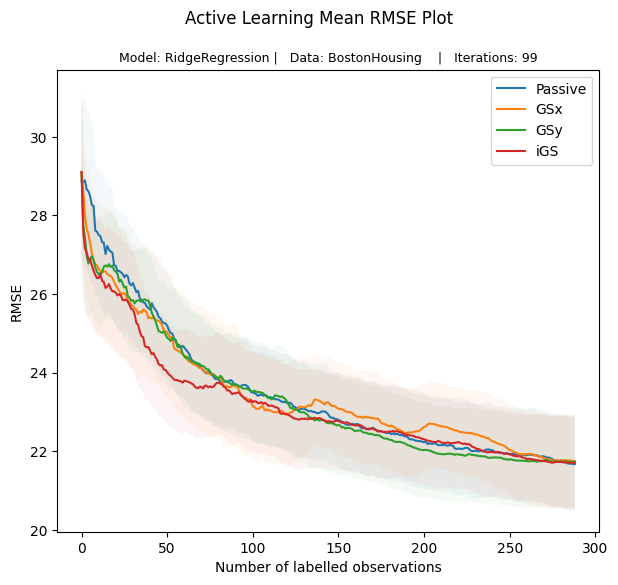

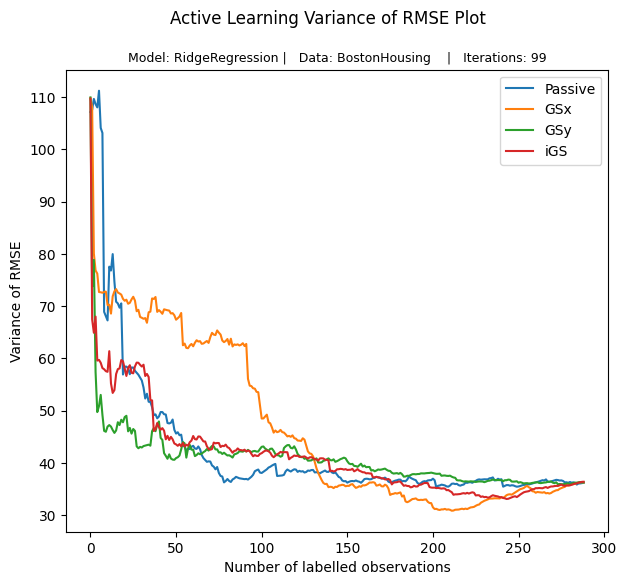

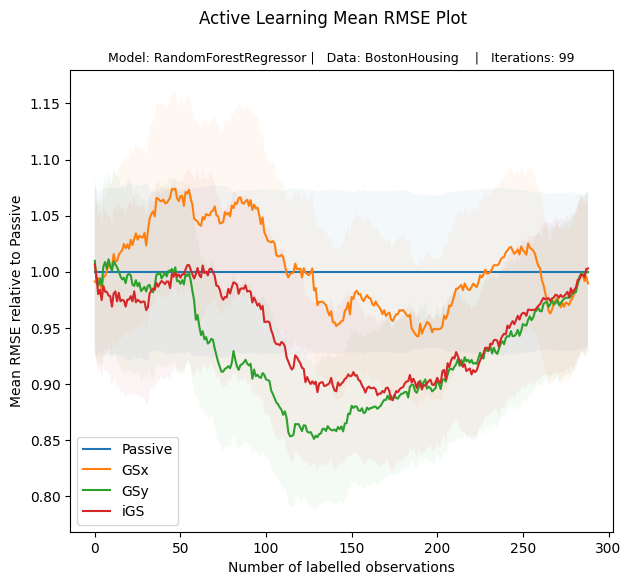

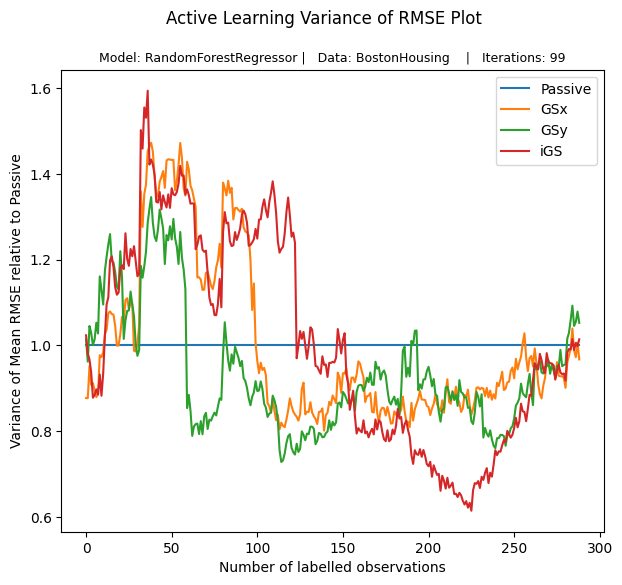

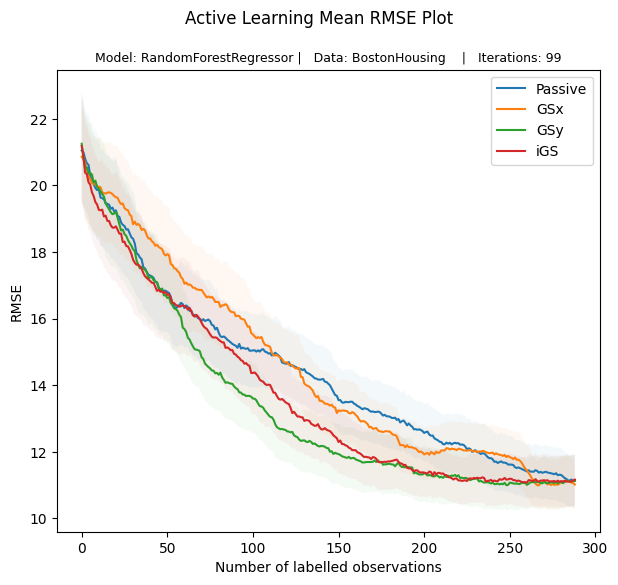

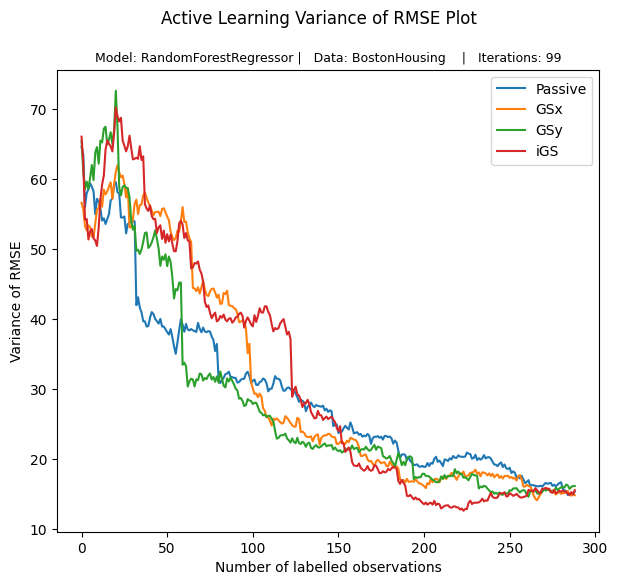

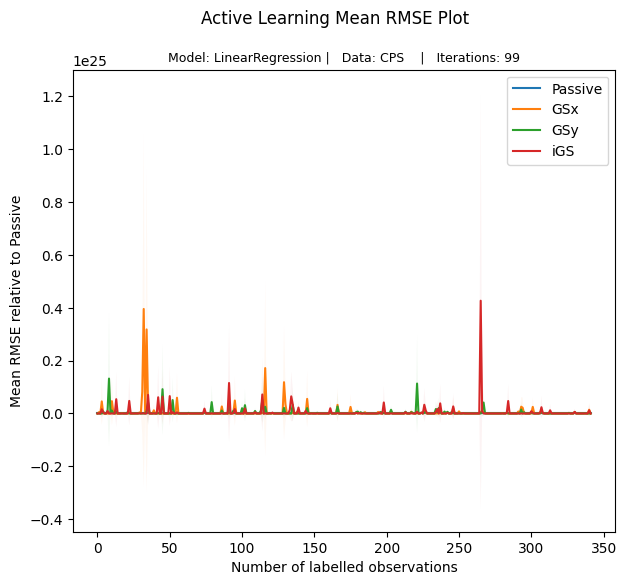

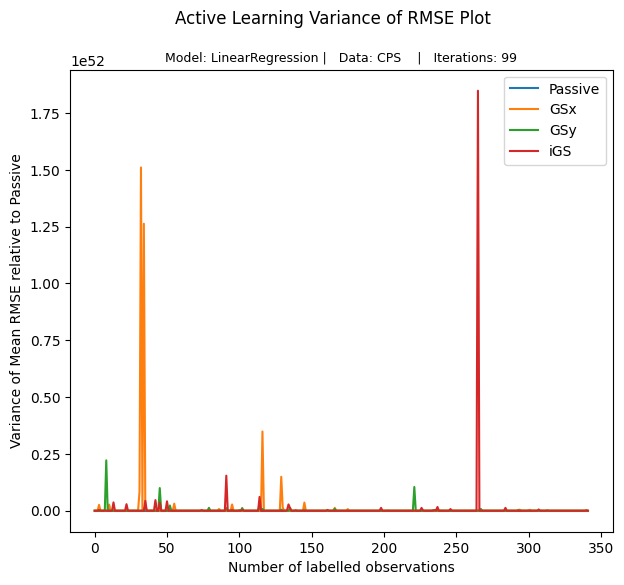

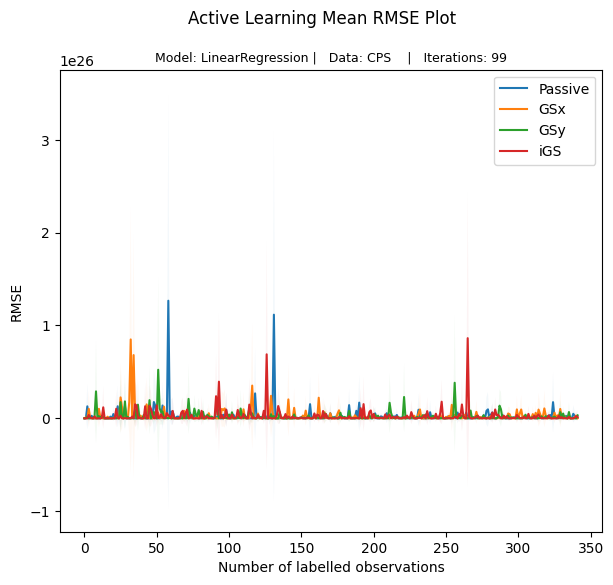

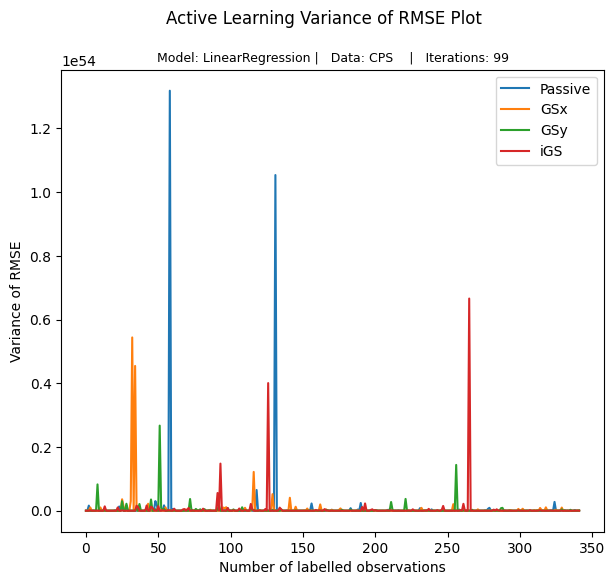

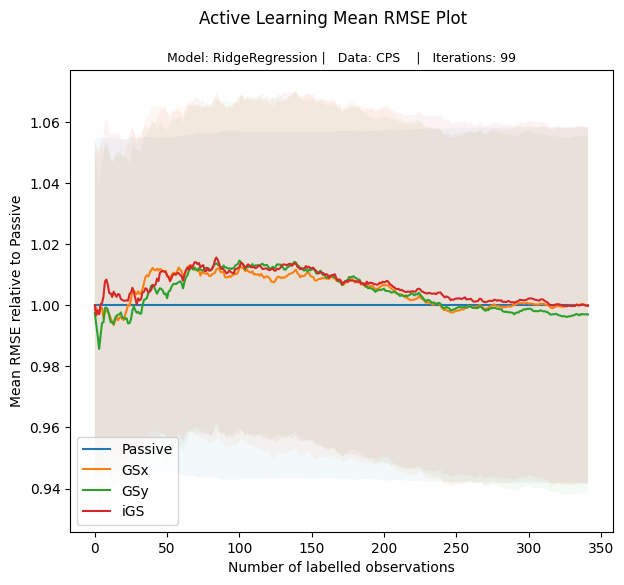

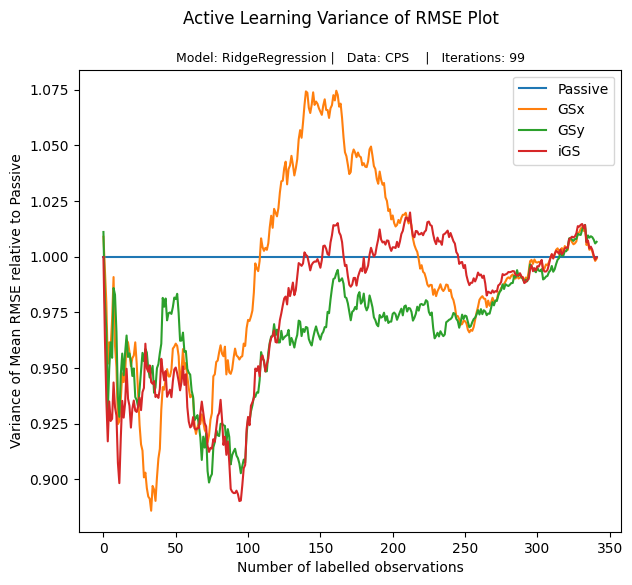

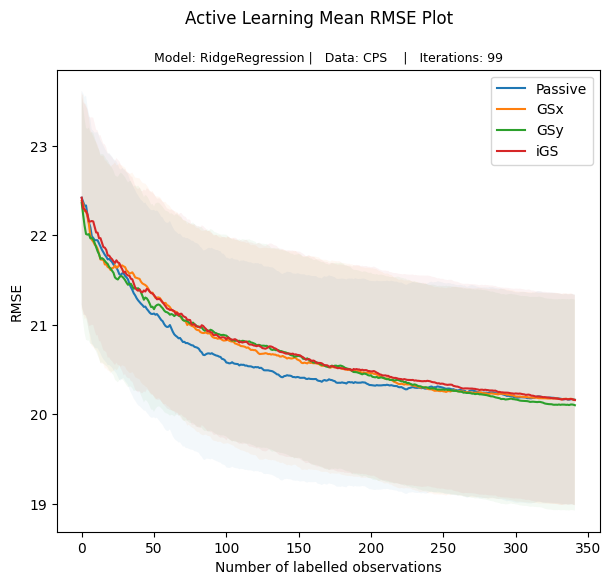

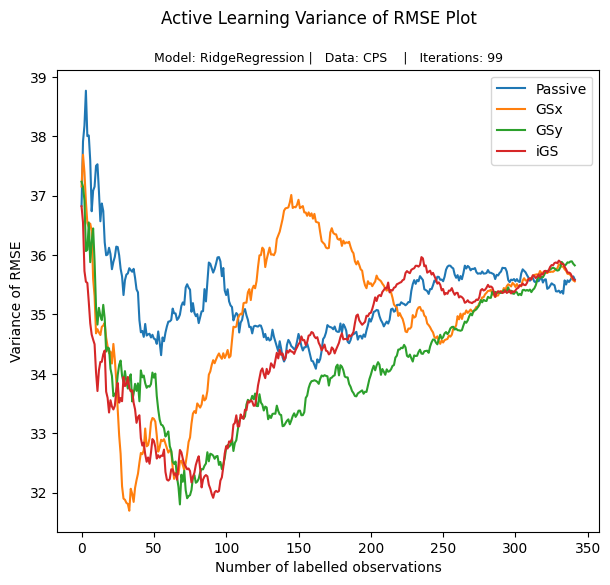

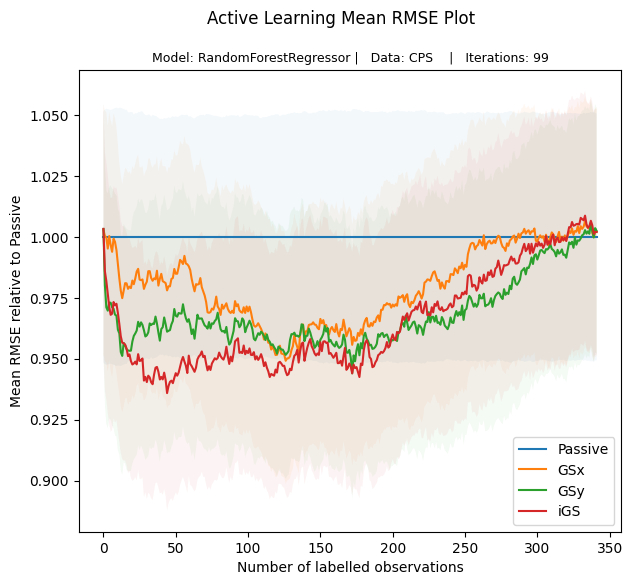

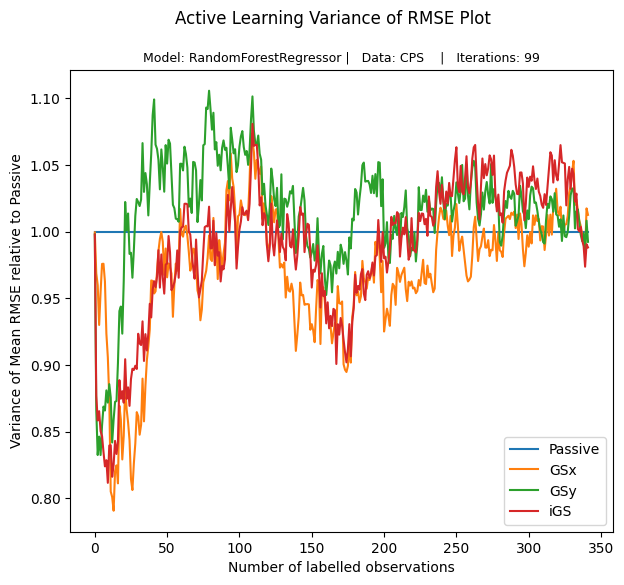

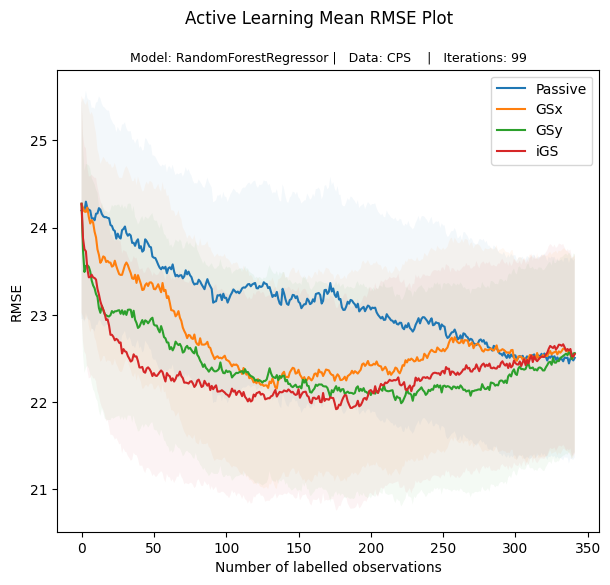

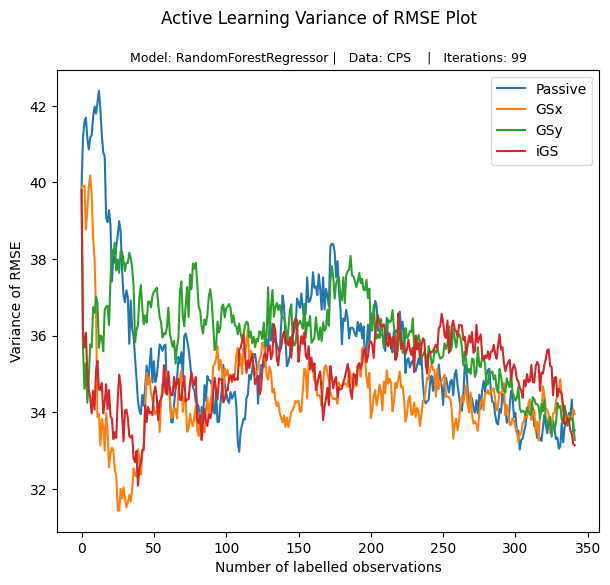

In [3]:
### Set Up ###
WRSTResultsDict = {}

### Get Results ###
for i in range(0, len(Combinations)):

    ### Set Up ###
    DataType = Combinations[i][0]
    ModelType = Combinations[i][1]
    RelativeType = Combinations[i][2]
    PlotArgs = {"TransparencyVal" : 0.05, "CriticalValue" : 1.96, "RelativeRMSE" : RelativeType}
    
    ### Get Results ###
    WRSTResults, MeanPlot, VariancePlot =  MakePlotFunctions(DataType, ModelType, PlotArgs, SaveInput = True)
    
    ### Save WRST Results ###
    if DataType not in WRSTResultsDict:
        WRSTResultsDict[DataType] = {}
    WRSTResultsDict[DataType][ModelType] = WRSTResults

In [8]:
WRSTResultsDict["Simulate"]["LinearRegression"]

,Passive,GSx,GSy,iGS
Passive,1.0,,,
GSx,1.2843859372302774e-35,1.0,,
GSy,4.237021325347659e-53,1.6245714885025028e-15,1.0,
iGS,2.0038951575241895e-76,0.0014135075000100018,6.999711508801404e-76,1.0
